<a href="https://colab.research.google.com/github/vinicius-souza-lima/mvp_ADBP/blob/main/MVP_ADBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução


Nome:Vinícius de Souza Lima.

Link para o Reposítório: [MVP Análise de Dados e Boas Práticas](https://github.com/vinicius-souza-lima/mvp_ADBP)


Foi utilizado um dataset proveniente do Kaggle, [Steam Games Dataset](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset?resource=download), o qual traz informações de mais de 85.000 jogos publicados na Steam, a maior plataforma de jogos de PC do mercado.

In [ ]:
#!pip install wordcloud

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from wordcloud import WordCloud
import re

In [ ]:
# Upload dos dados com carga do dataset através da url
games = pd.DataFrame({})
for i in range(10):
  url_dados = 'https://raw.githubusercontent.com/vinicius-souza-lima/mvp_ADBP/main/dataset/games-'+ str(i+1) + '.csv'
  games = pd.concat([games,pd.read_csv(url_dados)])

In [6]:
#@title Dicionário de dados
pd.DataFrame({"Nome": games.columns,
              "Significado": ["Identificador Único",
                              "Nome",
                              "Data de Lançamento",
                              "Estimativa de Quantidade de Usuários",
                              "Máximo número de jogadores simultâneos",
                              "Indicação etária",
                              "Preço em USD",
                              "Número de Extensões do Jogo",
                              "Sobre o jogo",
                              "Lista de linguas suportadas",
                              "Linguagens com dublagem completa",
                              "Avaliações",
                              "Imagem de capa na Steam",
                              "Url do site",
                              "Url do suporte",
                              "E-mail do suporte",
                              "Disponível no Windows?",
                              "Disponível no Mac?",
                              "Disponível no Linux?",
                              "Score no Metacritic",
                              "URL da review do Metacritic",
                              "Avaliação do usuário",
                              "Avaliações Positivas",
                              "Avaliações Negativas",
                              "Posição no rank de avaliações",
                              "Quantidade de conquistas Steam",
                             "Quantidade de recomendações",
                              "Notas",
                              "Tempo médio de jogo desde a publicação",
                              "Tempo médio de jogo nas ultimas duas semanas",
                              "Mediana do tempo de jogo desde a publicação",
                              "Mediana do tenpo de jogo nas ultimas duas semanas",
                              "Desenvolvedores",
                              "Publicadores",
                              "Categorias que o jogo se enquadra",
                              "Lista de gêneros do que o jogo se enquadra",
                              "Lista de Etiquetas",
                              "Url das capturas de tela",
                              "Url do clipe"]})

,Nome,Significado
0,AppID,Identificador Único
1,Name,Nome
2,Release date,Data de Lançamento
3,Estimated owners,Estimativa de Quantidade de Usuários
4,Peak CCU,Máximo número de jogadores simultâneos
5,Required age,Indicação etária
6,Price,Preço em USD
7,DLC count,Número de Extensões do Jogo
8,About the game,Sobre o jogo
9,Supported languages,Lista de linguas suportadas


In [ ]:
# Dicionário de Dados
descriptions ="""Identificador Único,string
Nome do Jogo,string
Data de Lançamento,string
Estimativa de Possuidores,string
Número de Usuários Atuais,int
Classificação indicativa,int
Preço em Dólares Americanos,float
Número de DLCs,int
Descrição detalhada dos jogos,string
Descrição curta dos jogos,string
Enumeração separada por vírgula das línguas suportadas, lista de strings
Enumeração separada por vírgula das línguas com suporte de aúdio, lista de strings
Imagem Principal na Loja,string
Website do Jogo,string
URL do Suporte do Jogo,string
Suporta Windows?,bool
Suporta Mac?,bool
Suporta Linux?,bool
Score do Metacritic,int
URL da review do Metecritic,string
Score do usuário,int
Votos Positivos,int
Votos negativos,int
Rank do score baseado nas reviews de usuários,string
Número de Conquistas,int
Recomendações de usuários,int
Informações extras,string
Tempo de jogo médio desde março de 2009 em minutos,int
Average playtime in the last two weeks, in minutes (int).
Median playtime since March 2009, in minutes (int).
Median playtime in the last two weeks, in minutes (int).
Game developers.
Developer name (string).
Game publishers.
Publisher name (string).
Game categories.
Category name (string).
Game genres.
Gender name (string).
Game screenshots.
Game screenshot URL,string.
Game movies.
Game movie URL,string.
Tags.
Tag key (string, int).
"""

# Definição do Problema

# Análise de Dados

## Estatísticas descritivas

### Verificação das primeiras linhas

In [ ]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Chama a atenção que inglês parece estar sempre presente entre as linguagens suportadas e que são mais comuns jogos com classificação indicativa livre.

### Valores faltantes

In [ ]:
games.isnull().sum().sort_values(ascending = False)

,0
Score rank,85059
Metacritic url,81191
Reviews,75360
Notes,72082
Website,45651
Support url,43517
Tags,21100
Support email,13596
Movies,6453
Categories,4598


<Axes: >

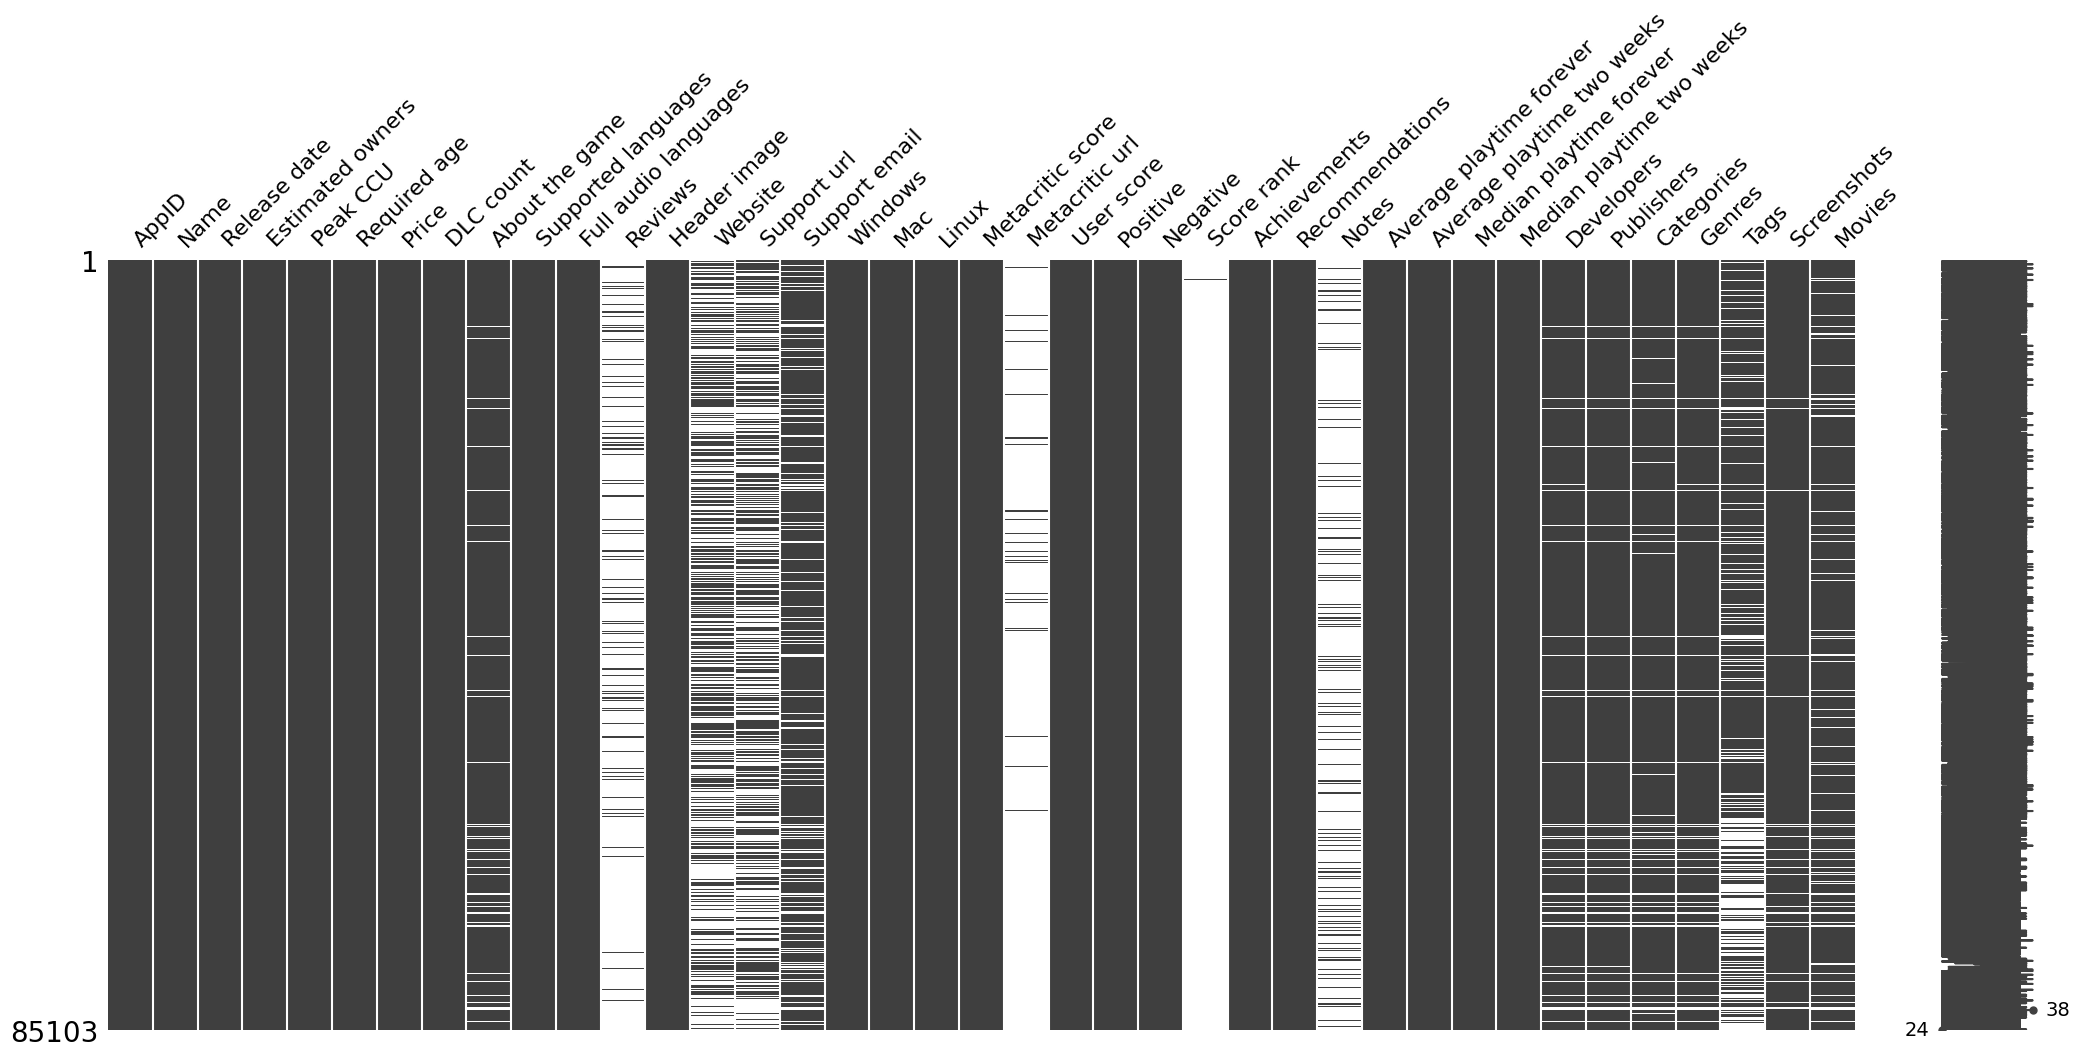

In [ ]:
ms.matrix(games)

### Resumo estatístico

In [ ]:
games.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,44.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,1.355681e+06,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,98.909091,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
std,6.949952e+05,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,0.857747,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.723900e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.331540e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.918415e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.765800e+06,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


Pode-se observar também o percentual de outliers em cada coluna numérica da seguinte forma

In [ ]:
# DataFrame apenas com valores numéricos
games_numeric = games.select_dtypes(include=[np.number])

# Definição intervalo interquantil
Q1 = games_numeric.quantile(0.25)
Q3 = games_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filtragem dos outliers e contagem do percentual
outliers = ( (games_numeric < (Q1 - 1.5 * IQR)) | (games_numeric > (Q1 + 1.5 * IQR)) ).sum()
total = games_numeric.count()
outliers/total*100

,0
AppID,5.185481
Peak CCU,18.307228
Required age,1.927077
Price,14.953644
DLC count,13.912553
Metacritic score,4.596783
User score,0.051702
Positive,21.107364
Negative,20.513965
Score rank,0.000000


## Visualizações

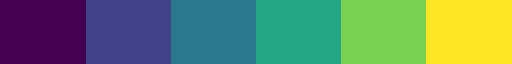

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [ ]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

#### Release date

In [ ]:
games_datetime = pd.to_datetime(games["Release date"], format = "mixed")
games_ano = games_datetime.groupby([games_datetime.dt.year]).agg({'count'})

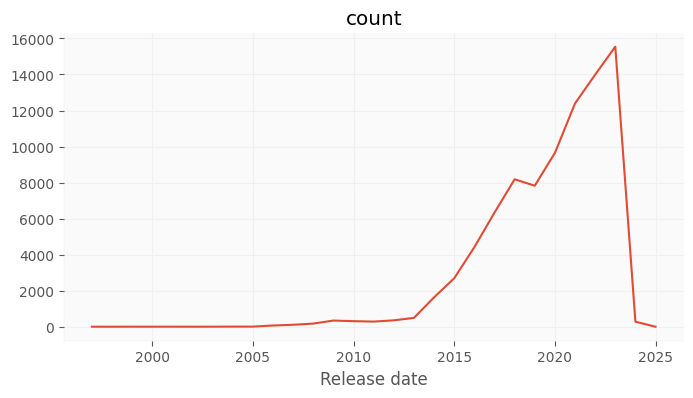

In [ ]:
games_ano['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

### Variáveis textuais

Para ilustrar as variáveis que contém teto, foram utilizadas nuvens de palavras. Abaixo é feita a implementação da função responsável por criar a nuvem de palavras. Como o tempo de execução da função é considerável (aproximadamente 1m30s) foram geradas as imagens anteriormente.

In [ ]:
def show_wordcloud(column):
  """
  Função para gerar uma nuvem de palavras a partir de colunas de texto do
  dataset utilizado
  """
  wordcloud = WordCloud(max_words = 100, background_color = "white")
  text = " ".join(str(word) for word in games[column].to_numpy())
  wordcloud.generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

#### Name

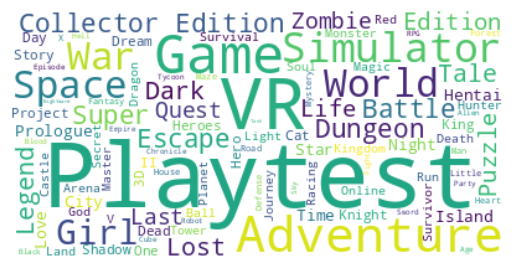

In [ ]:
show_wordcloud("Name")

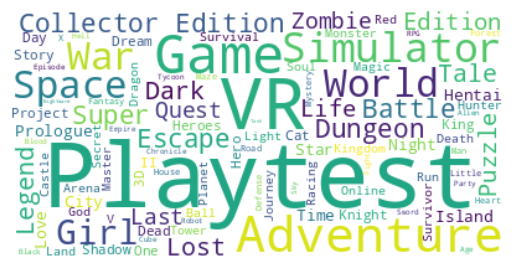

#### About the game

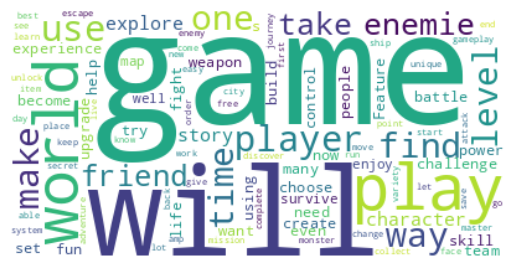

In [ ]:
show_wordcloud("About the game")

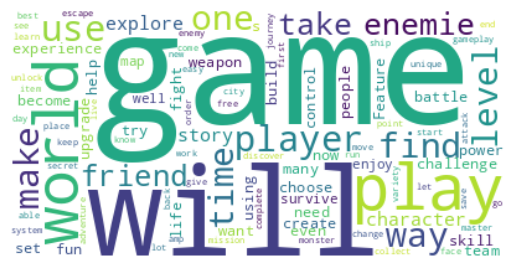

#### Reviews

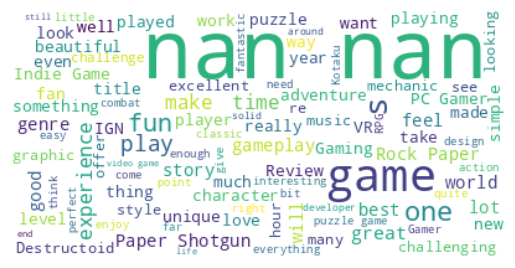

In [ ]:
show_wordcloud("Reviews")

### Variáveis Categóricas

#### Estimated owners

In [ ]:
estimated_owners_format = {
    '0 - 20000':'0 - 20K',
    '20000 - 50000':'20K - 50K',
    '50000 - 100000':'50K - 100K',
    '100000 - 200000':'100K - 200K',
    '200000 - 500000': '200K - 500K',
    '500000 - 1000000': '500K - 1M',
    '1000000 - 2000000': '1M - 2M',
    '2000000 - 5000000': '2M - 5M',
    '5000000 - 10000000': '5M - 10M',
    '10000000 - 20000000': '10M - 20M',
    '20000000 - 50000000': '20M - 50M',
    '50000000 - 100000000': '50M - 100M',
    '100000000 - 200000000': '100M - 200M'
}

In [ ]:
games['Estimated owners'] = games["Estimated owners"].map(estimated_owners_format).fillna(games["Estimated owners"])

Text(0.5, 1.0, 'Quantidade de donos estimados')

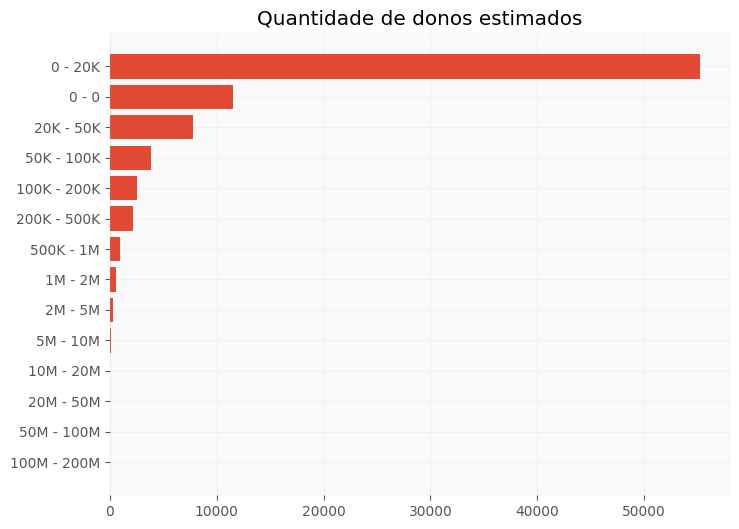

In [ ]:
owners_count = games["Estimated owners"].value_counts(ascending = True)
fig,ax = plt.subplots(figsize = (8,6))
ax.barh(y=owners_count.index,width=owners_count)
plt.title("Quantidade de donos estimados")

#### Categories

A função abaixo conta as aparições de

In [ ]:
def count_in_list(column_code):
  col_freq = {}
  for i in range(games.shape[0]):
    col_list = games.iloc[i,column_code]
    try:
      for col in col_list.split(","):
        if col not in col_freq:
          col_freq[col] = 0
        else:
          col_freq[col] += 1
    except AttributeError:
      continue
  return pd.DataFrame.from_dict(col_freq, orient = 'index', columns=["Count"]).sort_values(by="Count", ascending = False)

In [ ]:
df_cat = count_in_list(34)

<BarContainer object of 41 artists>

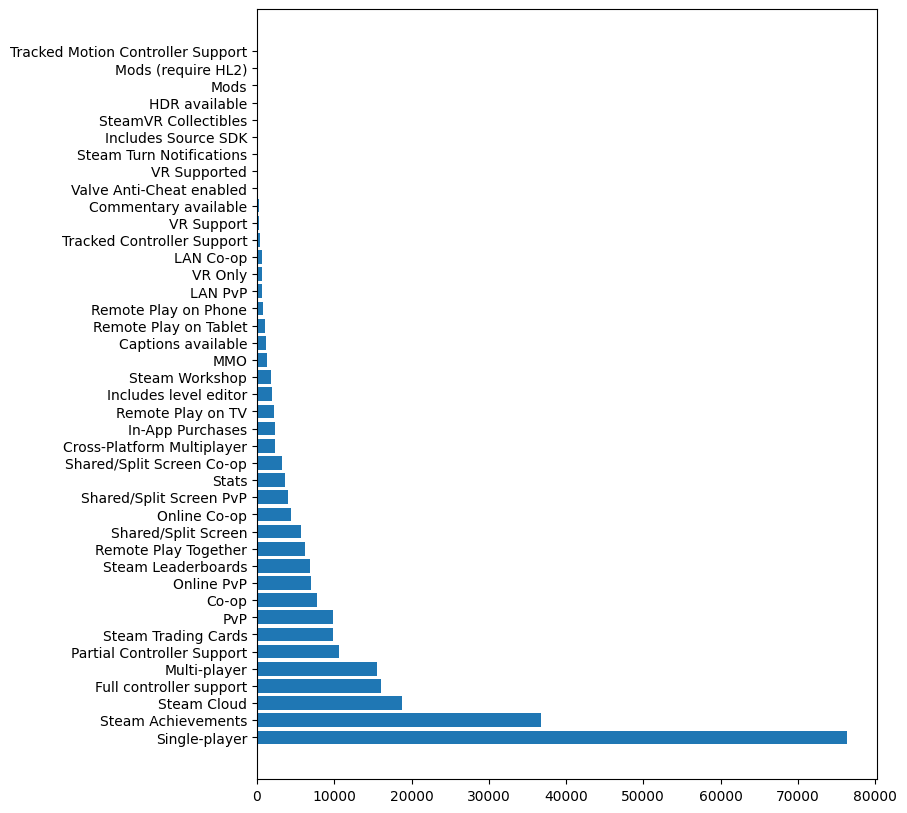

In [ ]:
fig,ax = plt.subplots(figsize = (8,10))
ax.barh(y=df_cat.index,width=df_cat["Count"])

#### Genres

In [ ]:
df_gen = count_in_list(35)

<BarContainer object of 33 artists>

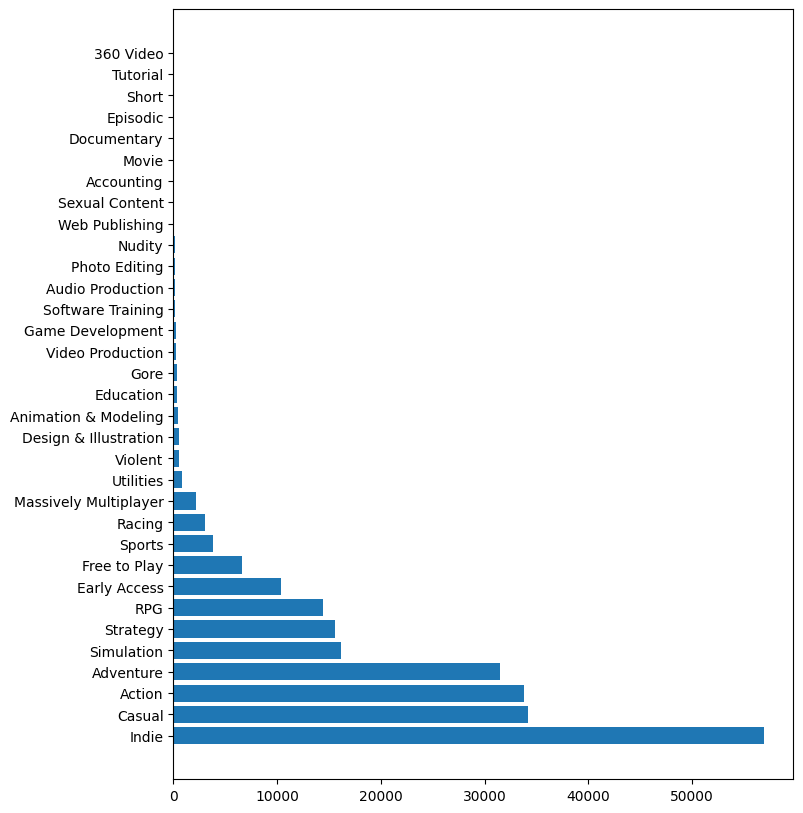

In [ ]:
fig,ax = plt.subplots(figsize = (8,10))
ax.barh(y=df_gen.index,width=df_gen["Count"])

#### Tags

In [ ]:
df_tags = count_in_list(36)

<BarContainer object of 20 artists>

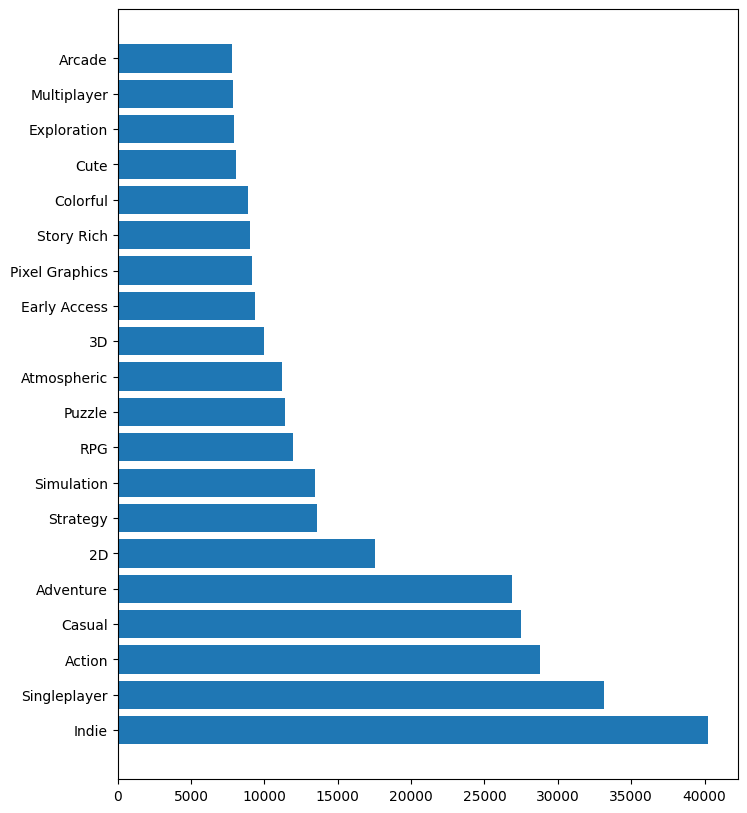

In [ ]:
df_tags = df_tags.head(20)
fig,ax = plt.subplots(figsize = (8,10))
ax.barh(y=df_tags.index,width=df_tags["Count"])

### Variáveis numéricas

O gráfico abaixo mostra a correlação entre as variáveis numéricas do dataset

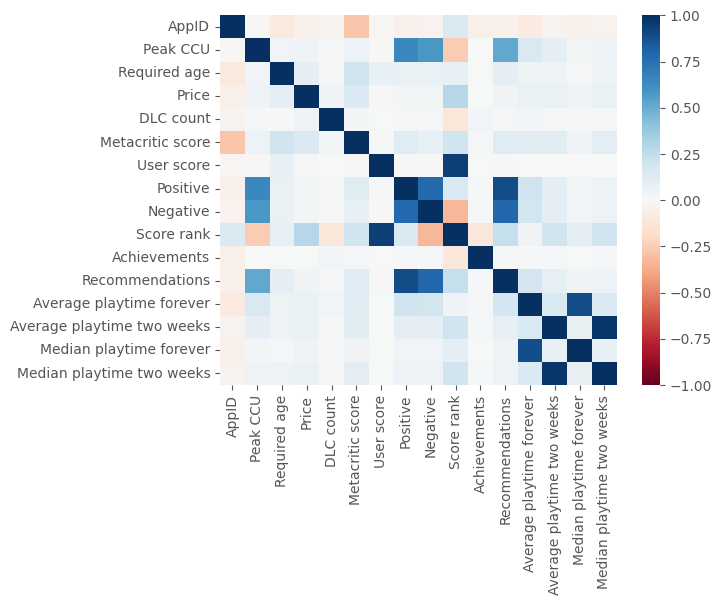

In [ ]:
sns.heatmap(games.select_dtypes(include=[np.number]).corr(), cmap='RdBu', vmin=-1, vmax=1);

Possível perceber relação positiva entre "Positive" e "Recomendations"

#### Peak CCU

In [ ]:
def remove_outliers(df,col,alfa):
  # Find the 95th quantile
  quantile = df[col].quantile(alfa)

  # Trim the outliers
  trimmed_df = df[df[col] < quantile]

  fig,ax = plt.subplots(2,1,figsize=(10,10))

  # The original histogram
  ax[0].hist(df[[col]])

  # The trimmed histogram
  ax[1].hist(trimmed_df[[col]])

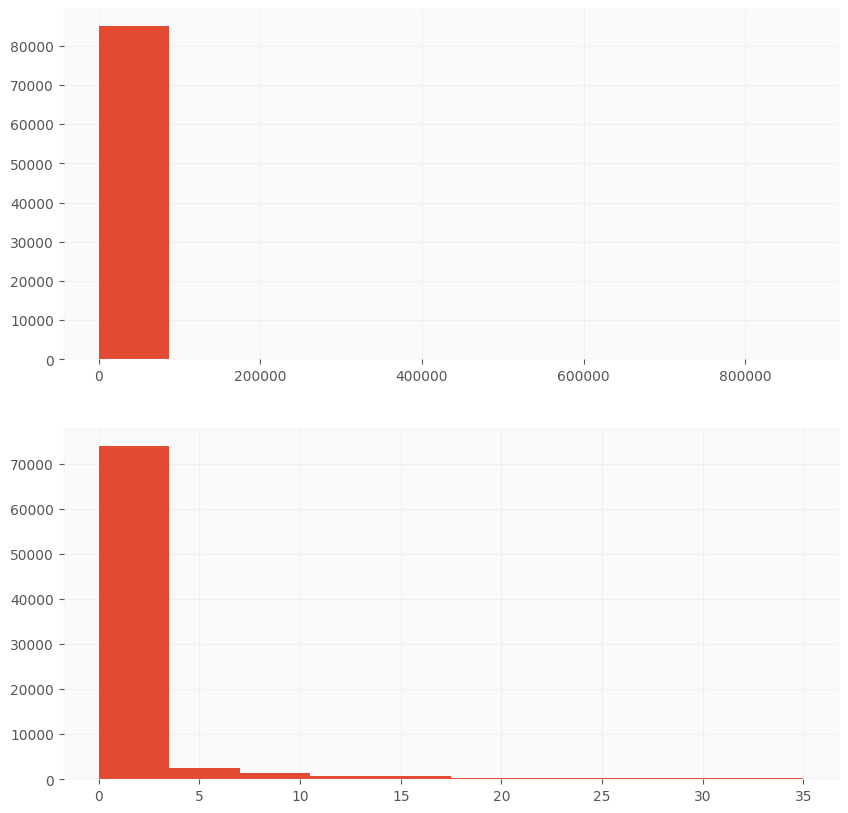

In [ ]:
remove_outliers(games,"Peak CCU",0.95)

#### Required Age

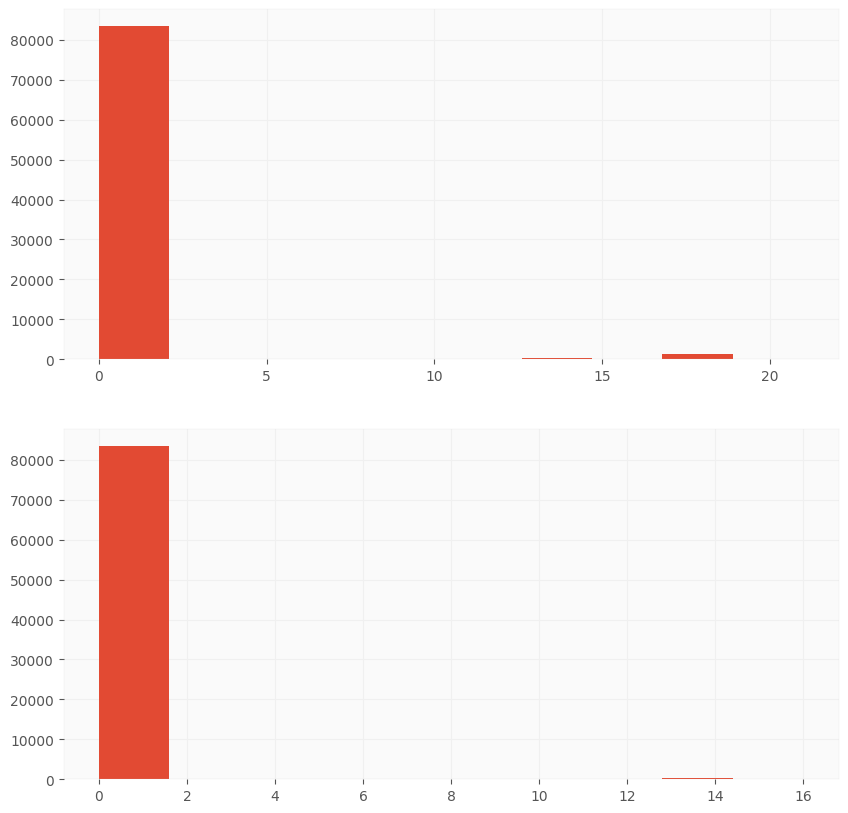

In [ ]:
remove_outliers(games,"Required age",0.99)

In [ ]:
games["Required age"].nlargest(10)

,Required age
6675,21
4197,21
4079,21
6597,21
3790,21
2122,20
10,20
7063,19
91,18
379,18


In [ ]:
games["Required age"].value_counts(ascending = False).head(5)

,count
Required age,
0,83463
17,919
18,333
13,204
16,68


#### Price

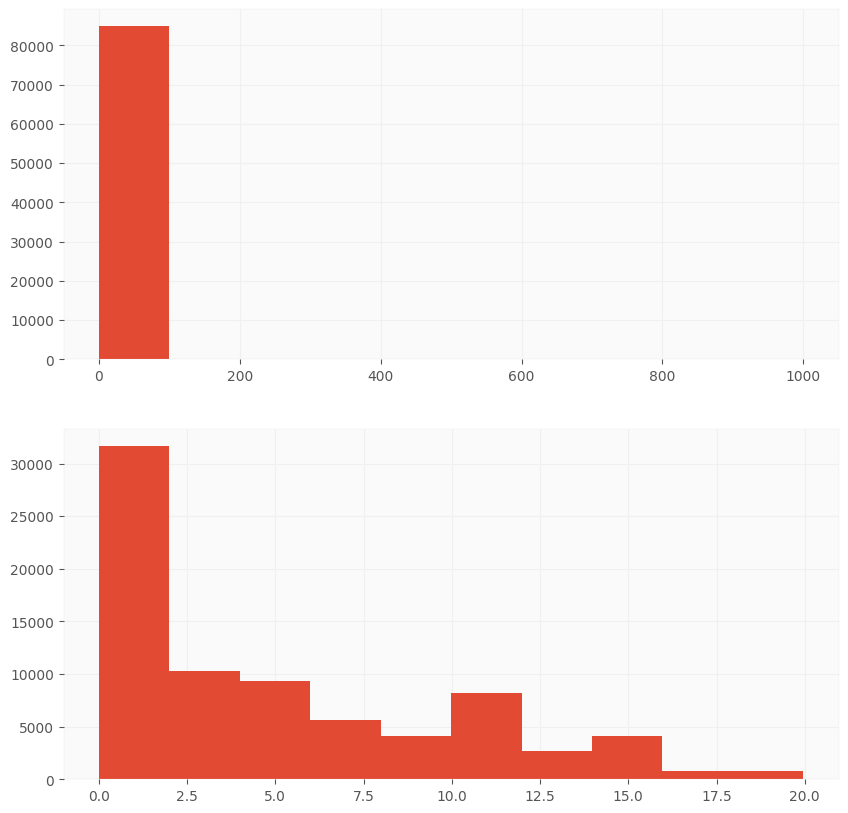

In [ ]:
remove_outliers(games,"Price",0.95)

#### DLC Count

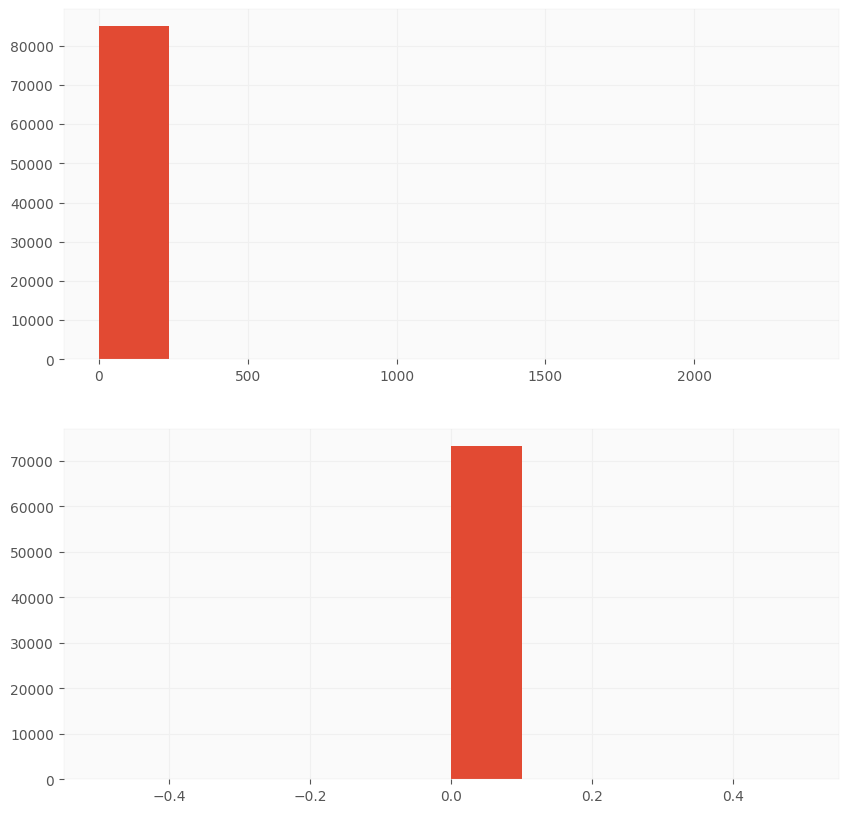

In [ ]:
remove_outliers(games,"DLC count",0.95)

#### Metacritic Score

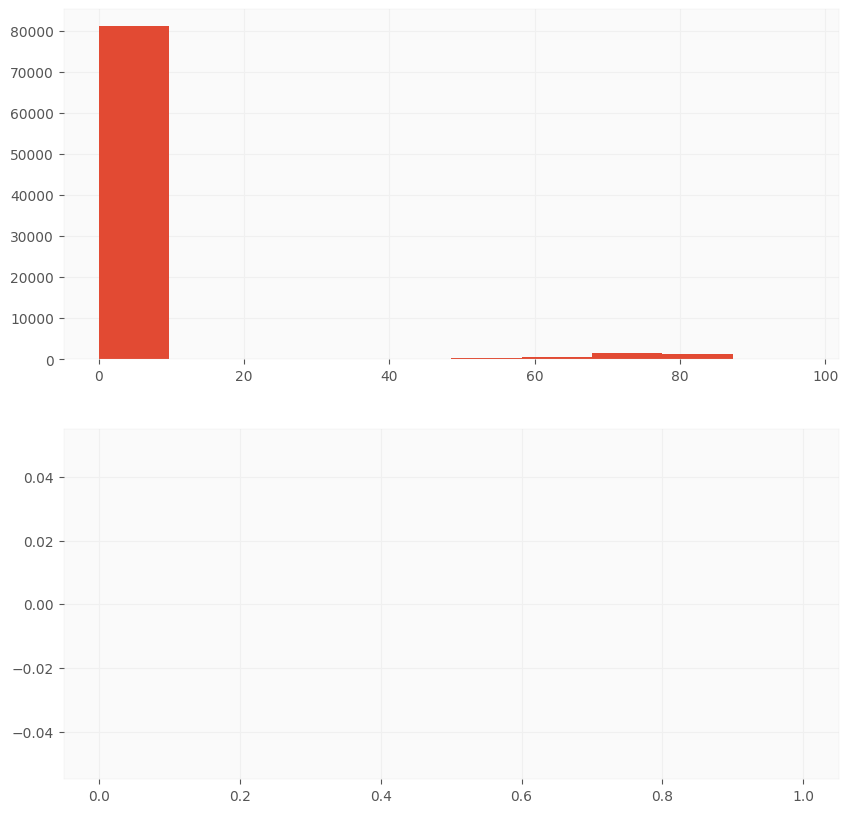

In [ ]:
remove_outliers(games,"Metacritic score",0.95)

<Axes: >

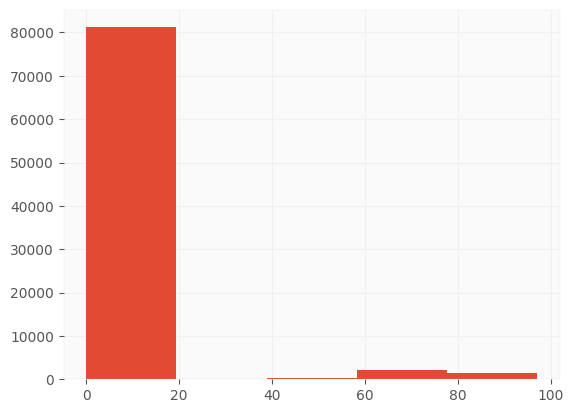

In [ ]:
games["Metacritic score"].hist(bins=5)

#### User Score

#### Positive

#### Negative

#### Score Rank

#### Achievements

#### Recommendations

#### Average Playtime Forever

#### Average Playtime Two Weeks

#### Median Playtime Forever

#### Median Playtime Two Weeks

#### Supported languages

In [ ]:
language_freq = {}
for i in range(games.shape[0]):
  langs_list = games.iloc[i,8].strip('][').replace("&amp","").replace("'","").replace("[b][/b]","").replace("\\r","").replace("\\n","")
  for lang in re.split('[;,]',langs_list):
    if lang not in language_freq:
      language_freq[lang] = 0
    else:
      language_freq[lang] += 1

In [ ]:
language_freq

# Pré-Processamento de Dados

### Tratamento dos dados

Como visto no início, *Release date* está com formato de objeto. Para facilitar a operação com essa coluna é interessante executar a transformação para o tipo DateTime.

In [ ]:
games["Release date"] = pd.to_datetime(games["Release date"],format = "mixed") #1

A coluna *Estimated owners* pode ser convertida para uma variável categórica, uma vez que seus valores podem ser classificados em categorias definidas

In [ ]:
games["Estimated owners"] = games["Estimated owners"].astype("category") #2

Dado que as colunas *Score rank*, *Reviews* e *Notes* apresentam no máximo 15% de valores não nulos, foram desconsideradas nas análises daqui para frente.

In [ ]:
games = games.drop(columns = ["Reviews", "Score rank","Notes","Metacritic url","""])

# Conclusão